In [ ]:
import datetime
print(f"Notebook las run(end-to-end):{datetime.datetime.now()}")

Notebook las run(end-to-end):2024-06-13 12:15:19.039043


In [ ]:
import zipfile
# Download zip file of pizza_steak images
!wget  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2024-06-13 12:15:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  34.1MB/s    in 3.3s    

2024-06-13 12:15:22 (32.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
!ls pizza_steak/test/

pizza  steak


In [ ]:
!ls pizza_steak/test/pizza/

1001116.jpg  1459760.jpg  2082495.jpg  254812.jpg   328965.jpg	 3785667.jpg  625434.jpg
1032754.jpg  1475479.jpg  2101820.jpg  2549661.jpg  3296507.jpg  3793004.jpg  645087.jpg
103708.jpg   1484836.jpg  2111981.jpg  2572488.jpg  3296907.jpg  380739.jpg   648055.jpg
1060407.jpg  148765.jpg   2124579.jpg  2582289.jpg  3316410.jpg  3814200.jpg  65128.jpg
106507.jpg   1503858.jpg  212995.jpg   2583389.jpg  331644.jpg	 3827990.jpg  666569.jpg
1067986.jpg  1506213.jpg  2157510.jpg  2605853.jpg  335474.jpg	 3898047.jpg  678708.jpg
1106738.jpg  1507019.jpg  2161321.jpg  2615100.jpg  3375083.jpg  3913440.jpg  714866.jpg
1119571.jpg  1512557.jpg  2165223.jpg  2619955.jpg  3376617.jpg  3919151.jpg  723745.jpg
11297.jpg    153195.jpg   2195935.jpg  2631321.jpg  3385460.jpg  395662.jpg   724290.jpg
1152100.jpg  1555015.jpg  2203687.jpg  2719697.jpg  3392194.jpg  397910.jpg   728260.jpg
1179703.jpg  1594097.jpg  2218680.jpg  2782998.jpg  341377.jpg	 398345.jpg   729262.jpg
1180001.jpg  1618659.jpg  

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# Another way to find how many images are in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
num_pizza_images_test=len(os.listdir("pizza_steak/test/pizza"))
num_pizza_images_test

250

In [ ]:
# Get the class names (programmatically, this os much more heplful with a longer list of classes)
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train/") # turn our trainig path into a python path
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))# Create a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # setup target directory(we'll view images from here)
  target_folder=target_dir+target_class

  # Get a random image path
  random_image=random.sample(os.listdir(target_folder),1)

  # Read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")


  print(f"image shape:{img.shape}")
  return img

image shape:(512, 512, 3)


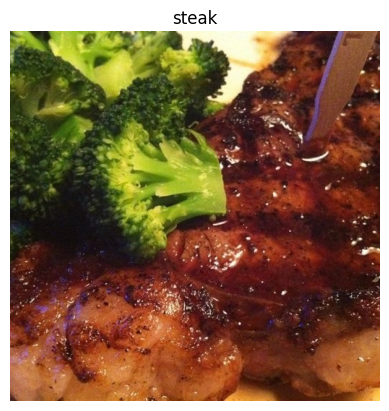

In [ ]:
# View a random image from the training dataset
img=view_random_image(target_dir="pizza_steak/train/",target_class="steak")

array([[[ 71,  85,  26],
        [ 84,  98,  36],
        [ 98, 114,  41],
        ...,
        [113,  58,  37],
        [ 93,  38,  18],
        [ 99,  44,  24]],

       [[ 56,  69,  13],
        [ 66,  82,  20],
        [ 82,  98,  27],
        ...,
        [107,  52,  31],
        [101,  46,  26],
        [101,  46,  26]],

       [[ 50,  64,  11],
        [ 52,  70,  12],
        [ 65,  81,  16],
        ...,
        [103,  51,  29],
        [110,  58,  37],
        [108,  56,  35]],

       ...,

       [[ 80,  41,  36],
        [ 71,  32,  27],
        [ 69,  28,  22],
        ...,
        [254, 211,  96],
        [254, 211,  96],
        [255, 213,  95]],

       [[ 83,  46,  40],
        [ 78,  41,  35],
        [ 78,  39,  32],
        ...,
        [250, 209,  93],
        [250, 209,  93],
        [252, 211,  95]],

       [[ 79,  42,  36],
        [ 85,  48,  42],
        [ 93,  54,  47],
        ...,
        [252, 211,  97],
        [252, 211,  95],
        [254, 213,  97]]], dtype=uint8)
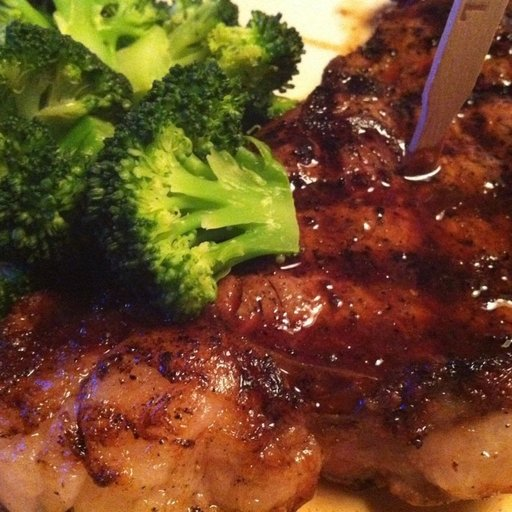

In [ ]:
# view the img( actually a big array/tensor)
img

In [ ]:
# normalize the dataset to be in the range of 0 t0 1
img/255

array([[[0.27843137, 0.33333333, 0.10196078],
        [0.32941176, 0.38431373, 0.14117647],
        [0.38431373, 0.44705882, 0.16078431],
        ...,
        [0.44313725, 0.22745098, 0.14509804],
        [0.36470588, 0.14901961, 0.07058824],
        [0.38823529, 0.17254902, 0.09411765]],

       [[0.21960784, 0.27058824, 0.05098039],
        [0.25882353, 0.32156863, 0.07843137],
        [0.32156863, 0.38431373, 0.10588235],
        ...,
        [0.41960784, 0.20392157, 0.12156863],
        [0.39607843, 0.18039216, 0.10196078],
        [0.39607843, 0.18039216, 0.10196078]],

       [[0.19607843, 0.25098039, 0.04313725],
        [0.20392157, 0.2745098 , 0.04705882],
        [0.25490196, 0.31764706, 0.0627451 ],
        ...,
        [0.40392157, 0.2       , 0.11372549],
        [0.43137255, 0.22745098, 0.14509804],
        [0.42352941, 0.21960784, 0.1372549 ]],

       ...,

       [[0.31372549, 0.16078431, 0.14117647],
        [0.27843137, 0.1254902 , 0.10588235],
        [0.27058824, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set random seed
tf.random.set_seed(42)

# noramlize the pixels of the images to be in the range of 0 and 1
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

# set up the train and test directories
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

# import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
# Create a CNN model
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),# first layer specifies the input shape (height, width, color)
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

# compile our model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_steps=len(valid_data)
                                                              )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 106ms/step - loss: 0.5766 - accuracy: 0.6887
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4661 - accuracy: 0.7953
Epoch 3/5
47/47 [==============================] - 5s 104ms/step - loss: 0.4302 - accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 5s 106ms/step - loss: 0.4010 - accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 5s 96ms/step - loss: 0.3317 - accuracy: 0.8673


In [ ]:
# set random seed
tf.random.set_seed(42)

# Create model_2
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 161ms/step - loss: 1.0193 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 133ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 156ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 153ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# set random seed
tf.random.set_seed(42)

# Create model 3
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
history_3=model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)
                      )

In [ ]:
model_3.summary()

1. Become one with data

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

2. **Preprocess the data**

In [ ]:
# define directory dataset path
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
# turn our data into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32 )

In [ ]:
images,labels=train_data.next()
len(images),len(labels)

In [ ]:
len(train_data)


In [ ]:
1500/32

In [ ]:
images[:2], images[0].shape

In [ ]:
labels

create cnn model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
# create the baseline of our convolutional neural network layer
model_4=Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           strides=(1,1),
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"]
                )

In [ ]:
model_4.summary()

In [ ]:
#fit the model
len(train_data), len(test_data)

In [ ]:
history_4=model_4.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 121s 3s/step - loss: 0.6035 - accuracy: 0.6773 - val_loss: 0.4185 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 118s 3s/step - loss: 0.3999 - accuracy: 0.8387 - val_loss: 0.3940 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 114s 2s/step - loss: 0.2405 - accuracy: 0.9187 - val_loss: 0.5256 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 113s 2s/step - loss: 0.0784 - accuracy: 0.9793 - val_loss: 0.5572 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 111s 2s/step - loss: 0.0215 - accuracy: 0.9973 - val_loss: 0.5887 - val_accuracy: 0.8100


** evaluating our model **

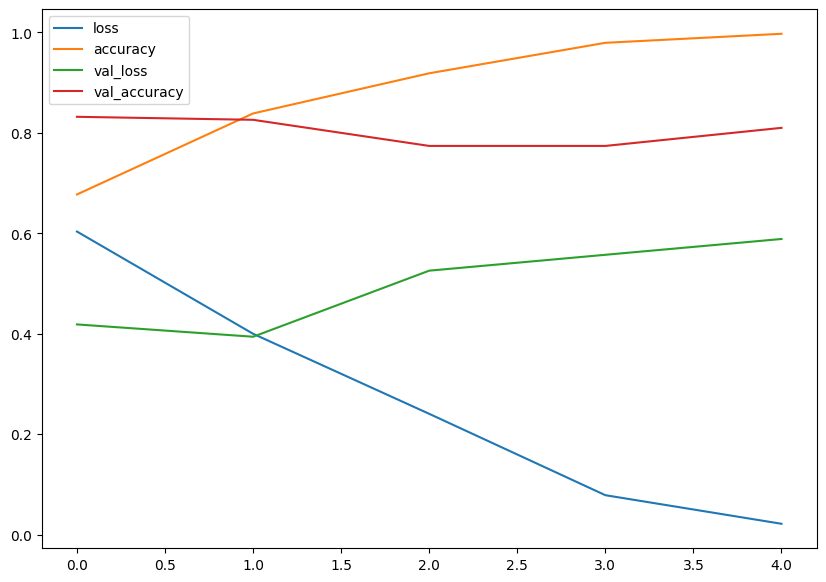

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
## plot the validation and accuracy curves separetely
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs,loss,label='trainig losss')
  plt.plot(epochs,val_loss,label='val loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label='training accuracy')
  plt.plot(epochs,val_accuracy,label='val accuracy')
  plt.title("accuracy")
  plt.xlabel('epochs')
  plt.legend()

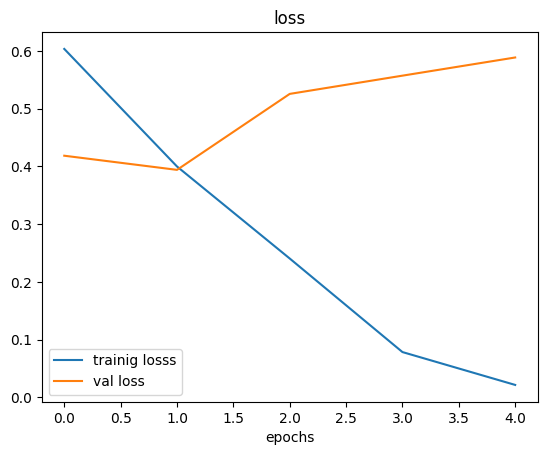

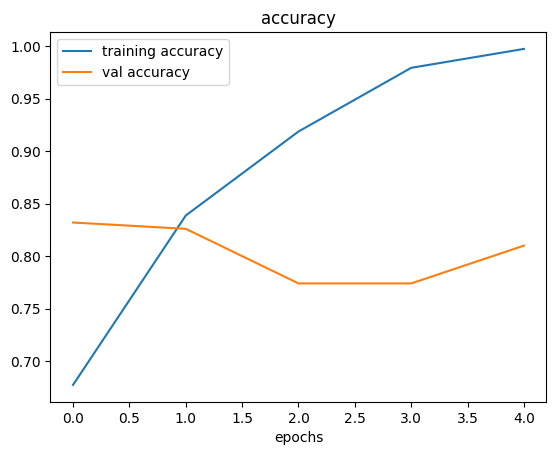

In [ ]:
plot_loss_curves(history_4)

In [ ]:
# since loss and val loss are not decreasing in the same rates, this implies that there's over fitting
# Reduce over fitting
model_5=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']
                )

In [ ]:
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data)
                      )

Epoch 1/5
47/47 [==============================] - 54s 1s/step - loss: 0.6610 - accuracy: 0.5847 - val_loss: 0.5696 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 53s 1s/step - loss: 0.5645 - accuracy: 0.7027 - val_loss: 0.5006 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 54s 1s/step - loss: 0.5087 - accuracy: 0.7600 - val_loss: 0.4636 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 55s 1s/step - loss: 0.4301 - accuracy: 0.8067 - val_loss: 0.4120 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 54s 1s/step - loss: 0.4065 - accuracy: 0.8273 - val_loss: 0.4738 - val_accuracy: 0.7740


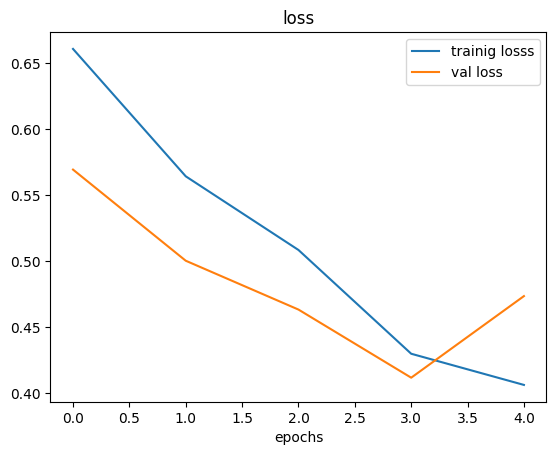

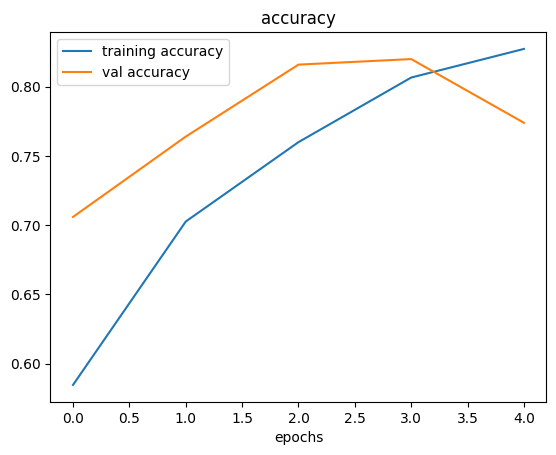

In [ ]:
plot_loss_curves(history_5)

## finding data augmentation

In [ ]:
# use ImageDataGenerator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True,
                                           vertical_flip=True
                                           )
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
print("augmented training data")
train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir,
                                                               target_size=(224,224),
                                                               batch_size=32,
                                                               class_mode="binary",
                                                               shuffle=False
                                                               )
print("non augmented training data")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False
                                             )
IMG_SIZE=(224,224,3)
print("non augmented test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary",
                                           )


augmented training data
Found 1500 images belonging to 2 classes.
non augmented training data
Found 1500 images belonging to 2 classes.
non augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=train_data.next()
augmented_images,augmented_labels=train_data_augmented.next()
len(images),len(augmented_images)

(32, 32)

showing non augmented image
showing image number 15
augmented Image


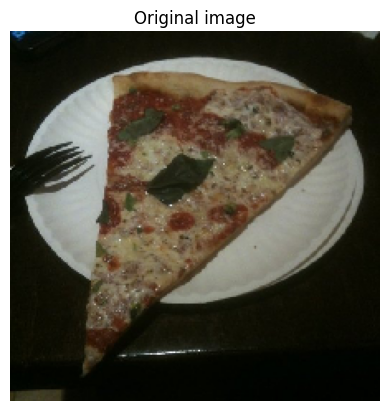

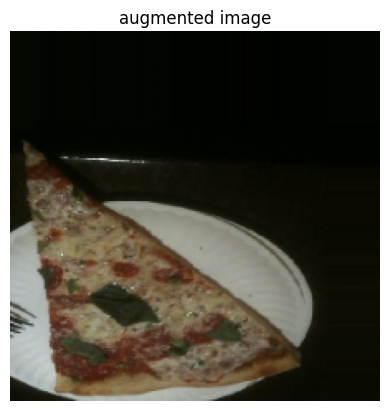

In [ ]:
import random
print("showing non augmented image")
random_number=random.randint(0,32)
print(f"showing image number {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
print("augmented Image")
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False);

In [ ]:
model_6=Sequential([
    Conv2D(10,3,activation="relu",),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data)
                      )

Epoch 1/5
47/47 [==============================] - 65s 1s/step - loss: 0.7194 - accuracy: 0.5147 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 62s 1s/step - loss: 0.6920 - accuracy: 0.5453 - val_loss: 0.6813 - val_accuracy: 0.5340
Epoch 3/5
47/47 [==============================] - 71s 1s/step - loss: 0.6920 - accuracy: 0.5613 - val_loss: 0.6769 - val_accuracy: 0.5460
Epoch 4/5
47/47 [==============================] - 64s 1s/step - loss: 0.6858 - accuracy: 0.5487 - val_loss: 0.6616 - val_accuracy: 0.5840
Epoch 5/5
47/47 [==============================] - 62s 1s/step - loss: 0.6788 - accuracy: 0.6100 - val_loss: 0.6180 - val_accuracy: 0.7480


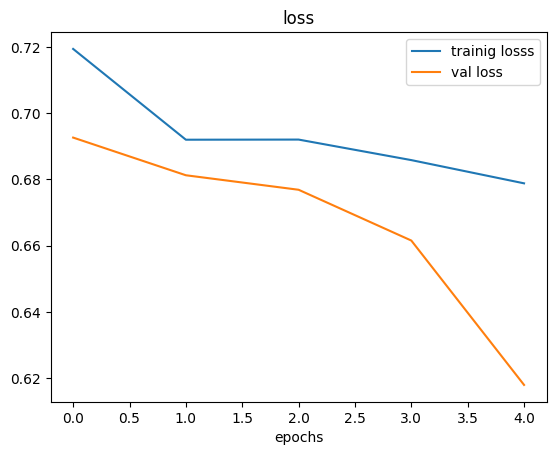

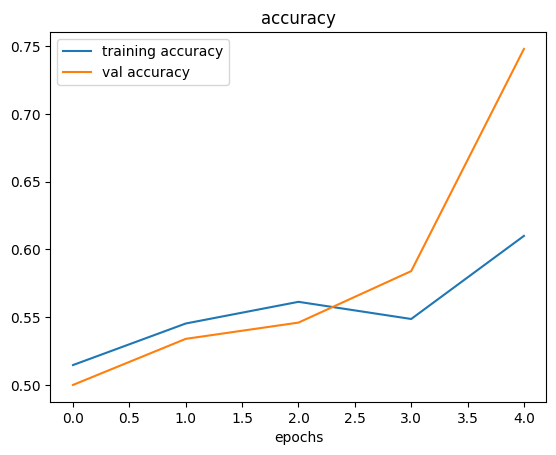

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                          target_size=(224,224),
                                                                          class_mode='binary',
                                                                          shuffle=True,
                                                                          batch_size=32)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model_7.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
history_7=model_7.fit(train_data_augmented_shuffled,
                    epochs=5,
                    steps_per_epoch=len(train_data_augmented_shuffled),
                    validation_data=test_data,
                    validation_steps=len(test_data)
                    )

Epoch 1/5
47/47 [==============================] - 67s 1s/step - loss: 0.6672 - accuracy: 0.6073 - val_loss: 0.5505 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 64s 1s/step - loss: 0.5176 - accuracy: 0.7547 - val_loss: 0.3671 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 62s 1s/step - loss: 0.4828 - accuracy: 0.7760 - val_loss: 0.3862 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 67s 1s/step - loss: 0.4610 - accuracy: 0.7873 - val_loss: 0.3961 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 62s 1s/step - loss: 0.4362 - accuracy: 0.8113 - val_loss: 0.3486 - val_accuracy: 0.8400


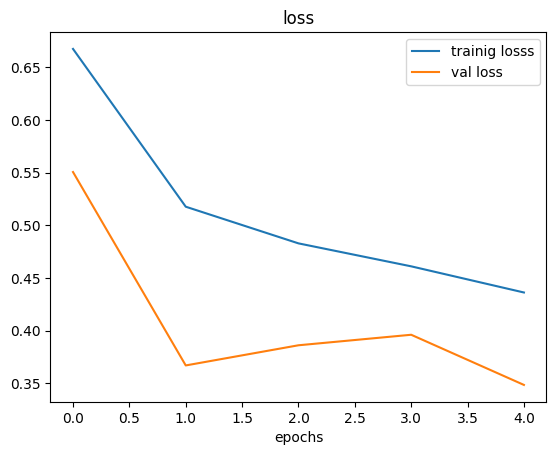

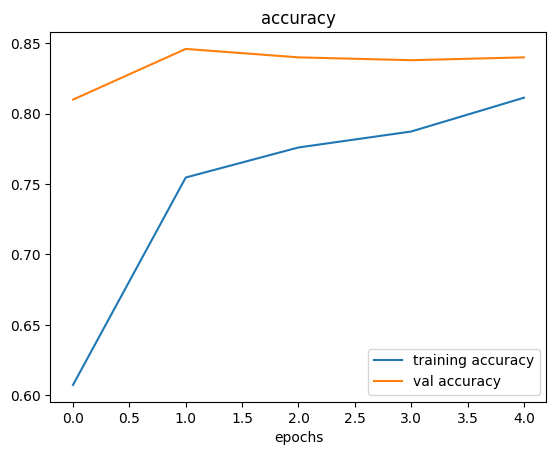

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_8=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model_8.compile(loss='binary_crossentropy',
               optimizer=Adam(lr=0.01),
               metrics=['accuracy'])
history_8=model_8.fit(train_data_augmented_shuffled,
                    epochs=5,
                    steps_per_epoch=len(train_data_augmented_shuffled),
                    validation_data=test_data,
                    validation_steps=len(test_data)
                    )

Epoch 1/5
47/47 [==============================] - 64s 1s/step - loss: 0.6419 - accuracy: 0.6333 - val_loss: 0.4869 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 64s 1s/step - loss: 0.5601 - accuracy: 0.7080 - val_loss: 0.4356 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 64s 1s/step - loss: 0.5137 - accuracy: 0.7640 - val_loss: 0.4425 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 65s 1s/step - loss: 0.4833 - accuracy: 0.7840 - val_loss: 0.3617 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 64s 1s/step - loss: 0.4827 - accuracy: 0.7767 - val_loss: 0.3413 - val_accuracy: 0.8500


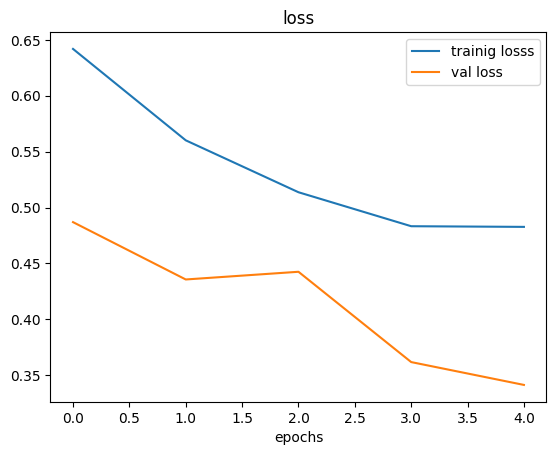

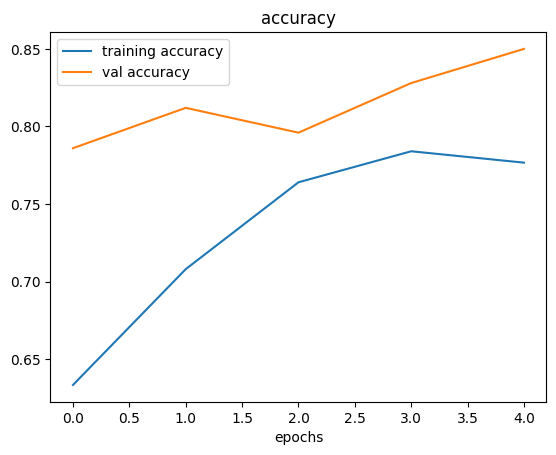

In [ ]:
plot_loss_curves(history_8)

In [ ]:
model_9=Sequential([
    Conv2D(64,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model_9.compile(loss='binary_crossentropy',
                optimizer=Adam(lr=0.01),
                metrics=['accuracy'])
history_9=model_9.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data)
                      )

Epoch 1/5
47/47 [==============================] - 199s 4s/step - loss: 0.6266 - accuracy: 0.6393 - val_loss: 0.6024 - val_accuracy: 0.6440
Epoch 2/5
47/47 [==============================] - 188s 4s/step - loss: 0.5489 - accuracy: 0.7233 - val_loss: 0.4096 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 188s 4s/step - loss: 0.5056 - accuracy: 0.7500 - val_loss: 0.3693 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 202s 4s/step - loss: 0.4803 - accuracy: 0.7760 - val_loss: 0.3365 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 188s 4s/step - loss: 0.4879 - accuracy: 0.7660 - val_loss: 0.3857 - val_accuracy: 0.8160


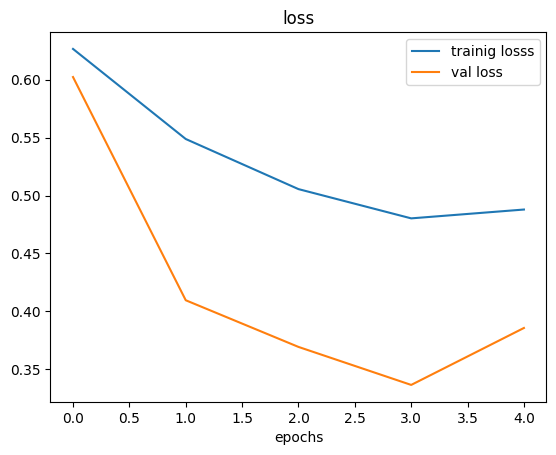

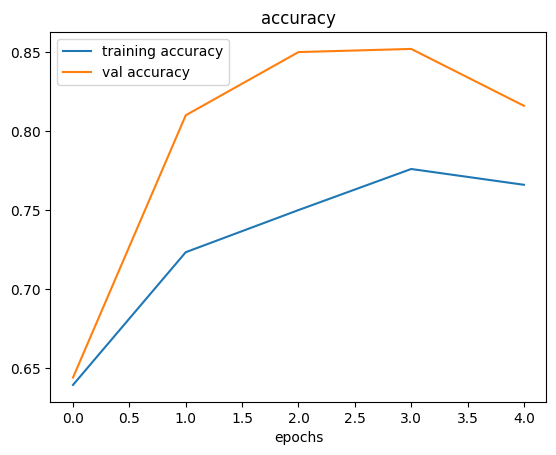

In [ ]:
plot_loss_curves(history_9)

In [ ]:
model_10=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model_10.compile(loss='binary_crossentropy',
               optimizer=Adam(lr=0.01),
               metrics=['accuracy'])
history_10=model_10.fit(train_data_augmented_shuffled,
                    epochs=10,
                    steps_per_epoch=len(train_data_augmented_shuffled),
                    validation_data=test_data,
                    validation_steps=len(test_data)
                    )

Epoch 1/10
47/47 [==============================] - 67s 1s/step - loss: 0.6318 - accuracy: 0.6367 - val_loss: 0.4939 - val_accuracy: 0.7560
Epoch 2/10
47/47 [==============================] - 64s 1s/step - loss: 0.5605 - accuracy: 0.7140 - val_loss: 0.4075 - val_accuracy: 0.8200
Epoch 3/10
47/47 [==============================] - 77s 2s/step - loss: 0.5126 - accuracy: 0.7427 - val_loss: 0.3904 - val_accuracy: 0.8160
Epoch 4/10
47/47 [==============================] - 63s 1s/step - loss: 0.4853 - accuracy: 0.7660 - val_loss: 0.5544 - val_accuracy: 0.7300
Epoch 5/10
47/47 [==============================] - 63s 1s/step - loss: 0.4985 - accuracy: 0.7587 - val_loss: 0.3674 - val_accuracy: 0.8420
Epoch 6/10
47/47 [==============================] - 64s 1s/step - loss: 0.4719 - accuracy: 0.7813 - val_loss: 0.3571 - val_accuracy: 0.8280
Epoch 7/10
47/47 [==============================] - 62s 1s/step - loss: 0.4747 - accuracy: 0.7780 - val_loss: 0.3595 - val_accuracy: 0.8400
Epoch 8/10
47/47 [==

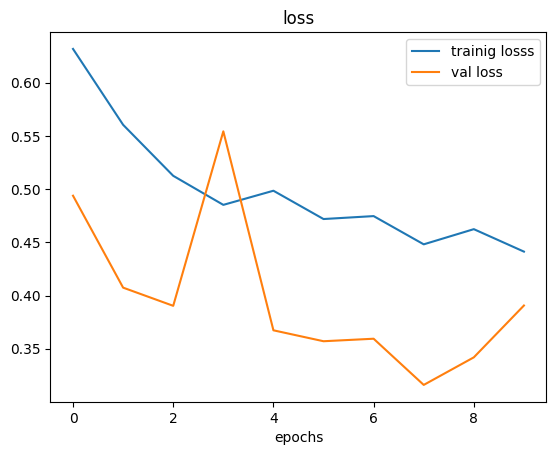

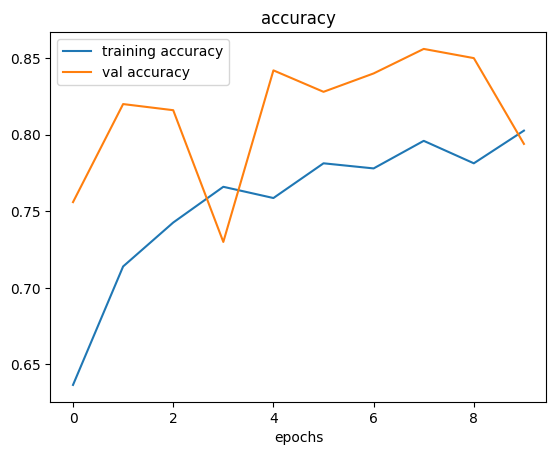

In [ ]:
plot_loss_curves(history_10)

In [ ]:
model_11=Sequential([
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model_11.compile(loss='binary_crossentropy',
               optimizer=Adam(lr=0.01),
               metrics=['accuracy'])
history_11=model_11.fit(train_data_augmented_shuffled,
                    epochs=8,
                    steps_per_epoch=len(train_data_augmented_shuffled),
                    validation_data=test_data,
                    validation_steps=len(test_data)
                    )

Epoch 1/8
47/47 [==============================] - 117s 2s/step - loss: 0.6637 - accuracy: 0.5813 - val_loss: 0.5708 - val_accuracy: 0.6740
Epoch 2/8
47/47 [==============================] - 117s 2s/step - loss: 0.5668 - accuracy: 0.6953 - val_loss: 0.4631 - val_accuracy: 0.8340
Epoch 3/8
47/47 [==============================] - 119s 2s/step - loss: 0.5091 - accuracy: 0.7607 - val_loss: 0.4521 - val_accuracy: 0.8100
Epoch 4/8
47/47 [==============================] - 117s 2s/step - loss: 0.5146 - accuracy: 0.7573 - val_loss: 0.4727 - val_accuracy: 0.7900
Epoch 5/8
47/47 [==============================] - 120s 3s/step - loss: 0.4847 - accuracy: 0.7707 - val_loss: 0.3494 - val_accuracy: 0.8600
Epoch 6/8
47/47 [==============================] - 115s 2s/step - loss: 0.4611 - accuracy: 0.7980 - val_loss: 0.3639 - val_accuracy: 0.8420
Epoch 7/8
47/47 [==============================] - 117s 2s/step - loss: 0.4786 - accuracy: 0.7767 - val_loss: 0.4981 - val_accuracy: 0.7880
Epoch 8/8
47/47 [===

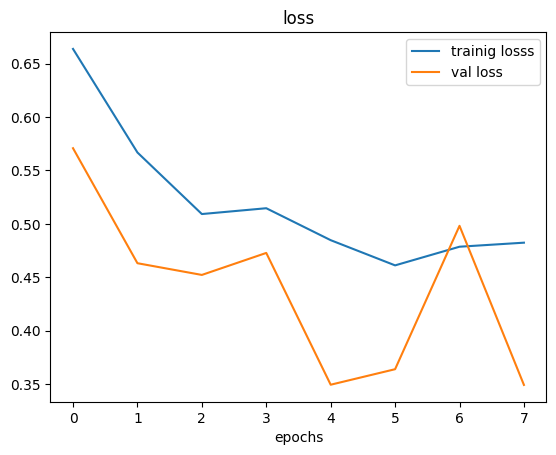

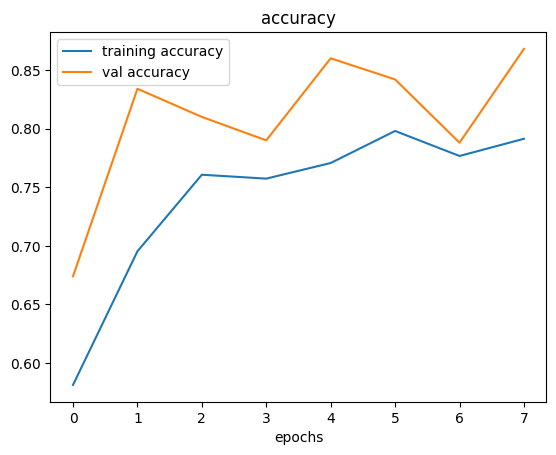

In [ ]:
plot_loss_curves(history_11)

In [ ]:
model_12=Sequential([
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model_12.compile(loss='binary_crossentropy',
               optimizer=Adam(lr=0.01),
               metrics=['accuracy'])
history_12=model_12.fit(train_data_augmented_shuffled,
                    epochs=5,
                    steps_per_epoch=len(train_data_augmented_shuffled),
                    validation_data=test_data,
                    validation_steps=len(test_data)
                    )

Epoch 1/5
47/47 [==============================] - 120s 2s/step - loss: 0.6925 - accuracy: 0.5127 - val_loss: 0.6763 - val_accuracy: 0.5720
Epoch 2/5
47/47 [==============================] - 120s 3s/step - loss: 0.5944 - accuracy: 0.6827 - val_loss: 0.4158 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 118s 3s/step - loss: 0.5027 - accuracy: 0.7667 - val_loss: 0.3853 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 120s 3s/step - loss: 0.4783 - accuracy: 0.7760 - val_loss: 0.3698 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 121s 3s/step - loss: 0.4663 - accuracy: 0.7807 - val_loss: 0.3570 - val_accuracy: 0.8520


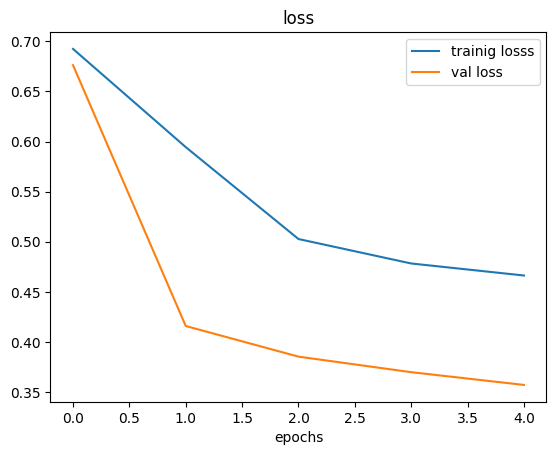

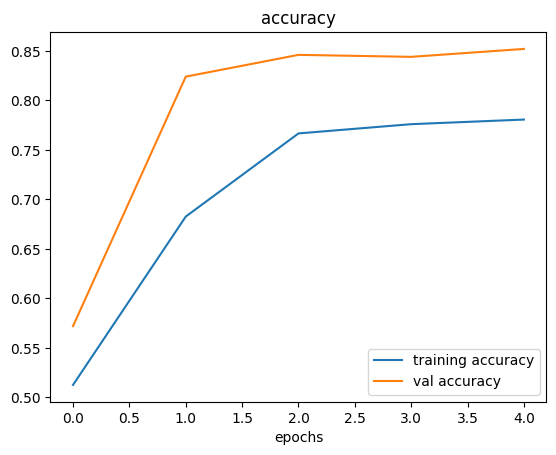

In [ ]:
plot_loss_curves(history_12)

In [ ]:
model_13=Sequential([
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model_13.compile(loss='binary_crossentropy',
               optimizer=Adam(lr=0.1),
               metrics=['accuracy'])
history_13=model_13.fit(train_data_augmented_shuffled,
                    epochs=10,
                    steps_per_epoch=len(train_data_augmented_shuffled),
                    validation_data=test_data,
                    validation_steps=len(test_data)
                    )

Epoch 1/10
47/47 [==============================] - 120s 3s/step - loss: 0.6135 - accuracy: 0.6613 - val_loss: 0.5642 - val_accuracy: 0.6820
Epoch 2/10
47/47 [==============================] - 120s 3s/step - loss: 0.5419 - accuracy: 0.7247 - val_loss: 0.4001 - val_accuracy: 0.8340
Epoch 3/10
47/47 [==============================] - 121s 3s/step - loss: 0.5014 - accuracy: 0.7493 - val_loss: 0.3673 - val_accuracy: 0.8500
Epoch 4/10
47/47 [==============================] - 126s 3s/step - loss: 0.4833 - accuracy: 0.7627 - val_loss: 0.3650 - val_accuracy: 0.8460
Epoch 5/10
47/47 [==============================] - 126s 3s/step - loss: 0.4589 - accuracy: 0.7993 - val_loss: 0.3338 - val_accuracy: 0.8620
Epoch 6/10
47/47 [==============================] - 126s 3s/step - loss: 0.4290 - accuracy: 0.7993 - val_loss: 0.3258 - val_accuracy: 0.8680
Epoch 7/10
47/47 [==============================] - 125s 3s/step - loss: 0.4513 - accuracy: 0.7840 - val_loss: 0.3762 - val_accuracy: 0.8320
Epoch 8/10
47

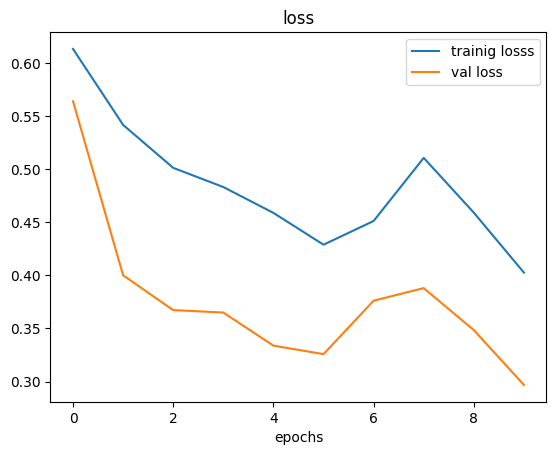

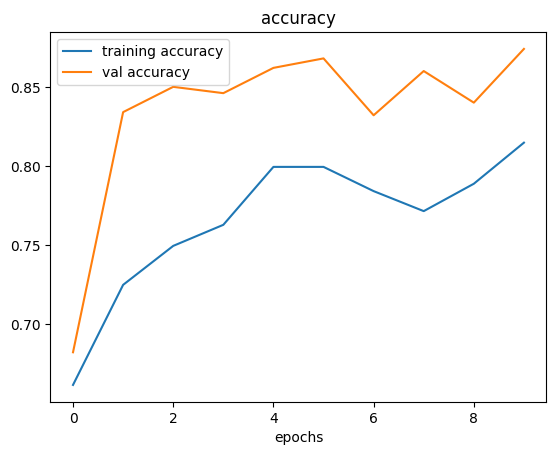

In [ ]:
plot_loss_curves(history_13)

In [ ]:
model_14=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model_14.compile(loss='binary_crossentropy',
               optimizer=Adam(lr=0.01),
               metrics=['accuracy'])
history_14=model_14.fit(train_data_augmented_shuffled,
                    epochs=8,
                    steps_per_epoch=len(train_data_augmented_shuffled),
                    validation_data=test_data,
                    validation_steps=len(test_data)
                    )

Epoch 1/8
47/47 [==============================] - 64s 1s/step - loss: 0.6389 - accuracy: 0.6273 - val_loss: 0.4949 - val_accuracy: 0.7560
Epoch 2/8
47/47 [==============================] - 66s 1s/step - loss: 0.5185 - accuracy: 0.7573 - val_loss: 0.3668 - val_accuracy: 0.8520
Epoch 3/8
47/47 [==============================] - 64s 1s/step - loss: 0.4838 - accuracy: 0.7780 - val_loss: 0.3593 - val_accuracy: 0.8620
Epoch 4/8
47/47 [==============================] - 64s 1s/step - loss: 0.4683 - accuracy: 0.7807 - val_loss: 0.3493 - val_accuracy: 0.8620
Epoch 5/8
47/47 [==============================] - 64s 1s/step - loss: 0.4482 - accuracy: 0.7947 - val_loss: 0.3193 - val_accuracy: 0.8600
Epoch 6/8
47/47 [==============================] - 64s 1s/step - loss: 0.4572 - accuracy: 0.7940 - val_loss: 0.3192 - val_accuracy: 0.8680
Epoch 7/8
47/47 [==============================] - 66s 1s/step - loss: 0.4534 - accuracy: 0.7833 - val_loss: 0.4012 - val_accuracy: 0.8160
Epoch 8/8
47/47 [==========

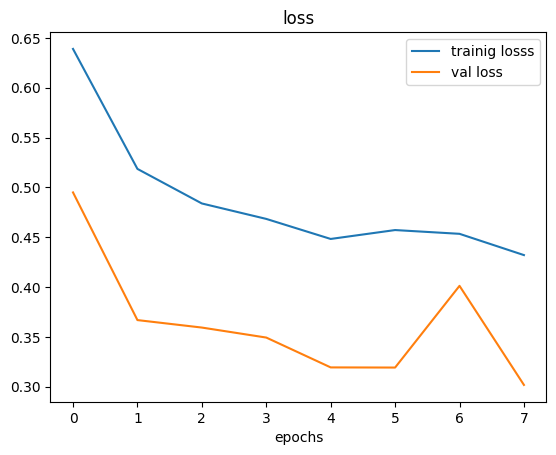

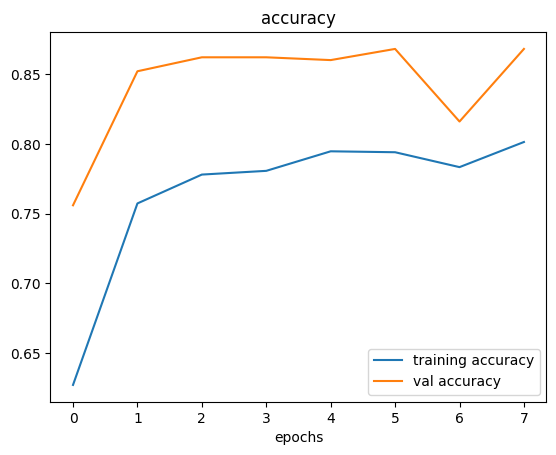

In [ ]:
plot_loss_curves(history_14)

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
steak=mpimg.imread('steak01.JPG')
plt.imshow(steak)
plt.axis(False)

FileNotFoundError: [Errno 2] No such file or directory: 'steak01.JPG'

In [ ]:
steak.shape

In [ ]:
# create a function that transforma our image
def load_and_prep_image(filename,img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255
  return img

In [ ]:
steak=load_and_prep_image('steak01.JPG')
steak

In [ ]:
pred=model_8.predict(tf.expand_dims(steak,axis=0))
pred

In [ ]:
pred_class=class_names[int(tf.round(pred))]
pred_class

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
steak=mpimg.imread('steak02.JPG')
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak1=load_and_prep_image('steak02.JPG')
steak1

In [ ]:
pred1=model_8.predict(tf.expand_dims(steak1,axis=0))
pred1

In [ ]:
pred_class=class_names[int(tf.round(pred1))]
pred_class

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
pizza=mpimg.imread('pizza.JPG')
plt.imshow(pizza)
plt.axis(False)

In [ ]:
pizza=load_and_prep_image('pizza.JPG')
pizza

In [ ]:
pred2=model_12.predict(tf.expand_dims(pizza,axis=0))
pred2

In [ ]:
pred_class=class_names[int(tf.round(pred2))]
pred_class

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
pizza1=mpimg.imread('pizza1.JPG')
plt.imshow(pizza1)
plt.axis(False)

In [ ]:
pizza1=load_and_prep_image('pizza1.JPG')
pizza1

In [ ]:
pred3=model_8.predict(tf.expand_dims(pizza1,axis=0))
pred3

In [ ]:
pred_class=class_names[int(tf.round(pred3))]
pred_class

***multi-class image classification***

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
# unzip our data
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)}images in {dirpath}.")

In [ ]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

In [ ]:
import random
img=view_random_image(train_dir,random.choice(class_names))

***preprocessing data***

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# rescale
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

# load data in from directories and turn into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="categorical")

In [ ]:
model_15=Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
model_15.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
history_15=model_15.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data)
                    )

In [ ]:
plot_loss_curves(history_15)

In [ ]:
model_16=Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
model_16.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
history_16=model_16.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data)
                    )

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                        rotation_range=0.2,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True
                                        )
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="categorical"
                                                                 )

In [ ]:
model_17=Sequential([
    Conv2D(10,3,activation='relu',),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
model_17.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

In [ ]:
history_17=model_17.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

In [ ]:
plot_loss_curves(history_17)

In [ ]:
model_18=Sequential([
    Conv2D(32,3,activation='relu',),
    MaxPool2D(pool_size=2),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
model_18.compile(loss='categorical_crossentropy',
                 optimizer=Adam(lr=0.01),
                 metrics=['accuracy'])
history_18=model_18.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

In [ ]:
## making prediction with our trained model

In [ ]:
class_names

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

In [ ]:
list(class_names)

In [ ]:
# reconfig prep_and_plot function to work with multi-class images
def pred_and_plot(model,filename,class_names=class_names):
  img=load_and_prep_image(filename)
  # make a prediction
  pred= model.predict(tf.expand_dims(img, axis=0))
  # add in logic for multiclass and get pred_class name
  if len(pred[0]>1):
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class==class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"prediction:{pred_class}")
  plt.axis(False);

In [ ]:
pred_and_plot(model_18,"03-pizza-dad.jpeg")

In [ ]:
pred_and_plot(model_18,"03-hamburger.jpeg")

In [ ]:
pred_and_plot(model_18,"03-sushi.jpeg")

In [ ]:
pred_and_plot(model_7,"03-steak.jpeg",class_names=["pizza","steak"])

In [ ]:
model_7.save("saved_trained_model_7")